In [1]:
## Data Analysis
import math
import numpy as np
import numpy.random as nr
import pandas as pd
import scipy.stats as ss 

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
import sklearn.metrics as sklm
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/Users/Drama/Documents/EDX/DAT102x/Data/train_values.csv")
label = pd.read_csv("/Users/Drama/Documents/EDX/DAT102x/Data/train_labels.csv")
test = pd.read_csv("/Users/Drama/Documents/EDX/DAT102x/Data/test_values.csv")
test_Id = test["row_id"]

In [3]:
print("Train data dimension:" + str(train.shape))
print("--------------------------------")
print("Test data dimension: " + str(test.shape))

Train data dimension:(3198, 34)
--------------------------------
Test data dimension: (3080, 34)


In [4]:
train2 = train
train2.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a


In [5]:
print(train.shape)
print(train.row_id.unique().shape)
print(test.shape)
print(test.row_id.unique().shape)

(3198, 34)
(3198,)
(3080, 34)
(3080,)


In [6]:
label.describe()

,row_id,heart_disease_mortality_per_100k
count,3198.000000,3198.000000
mean,3116.985616,279.369293
std,1830.236781,58.953338
min,0.000000,109.000000
25%,1504.250000,237.000000
50%,3113.500000,275.000000
75%,4724.750000,317.000000
max,6276.000000,512.000000


In [7]:
train.describe()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician
count,3198.000000,3198.000000,3198.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,...,2734.000000,3196.000000,3016.000000,2220.000000,3196.000000,3170.000000,1231.000000,2781.000000,2954.000000,2968.000000
mean,3116.985616,0.467191,0.059696,0.217463,0.086067,0.498811,0.227715,0.170043,0.090207,0.091046,...,0.213628,0.109260,0.083896,0.164841,0.277161,11.625868,5.947498,21.132618,3431.433649,2551.339286
std,1830.236781,0.074400,0.022947,0.067362,0.039849,0.024399,0.034282,0.043694,0.142763,0.147165,...,0.062895,0.023216,0.022251,0.050474,0.053003,1.557996,5.031822,10.485923,2569.450603,2100.459467
min,0.000000,0.207000,0.010000,0.046000,0.012000,0.278000,0.092000,0.045000,0.000000,0.000000,...,0.046000,0.032000,0.033000,0.038000,0.090000,7.000000,-0.400000,3.140000,339.000000,189.000000
25%,1504.250000,0.420000,0.044000,0.166000,0.057000,0.493000,0.206000,0.141000,0.019000,0.006000,...,0.172000,0.094000,0.069000,0.130000,0.242750,10.000000,2.620000,13.490000,1812.250000,1420.000000
50%,3113.500000,0.468000,0.057000,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,...,0.210000,0.109000,0.081000,0.164000,0.280000,12.000000,4.700000,19.630000,2690.000000,1999.000000
75%,4724.750000,0.514000,0.072000,0.261000,0.106000,0.512000,0.246000,0.195000,0.087000,0.096000,...,0.249000,0.124000,0.095000,0.197000,0.313000,13.000000,7.890000,26.490000,4089.750000,2859.000000
max,6276.000000,1.000000,0.248000,0.496000,0.281000,0.573000,0.417000,0.346000,0.932000,0.858000,...,0.513000,0.203000,0.238000,0.367000,0.442000,15.000000,50.490000,110.450000,28130.000000,23399.000000


In [8]:
label.head()

,row_id,heart_disease_mortality_per_100k
0,0,312
1,1,257
2,4,195
3,5,218
4,6,355


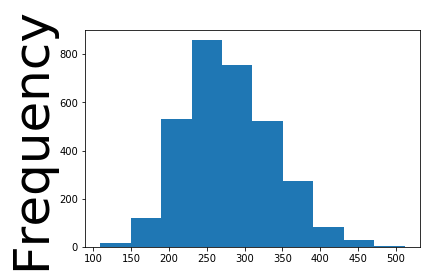

In [9]:
plt.hist(label["heart_disease_mortality_per_100k"])
plt.ylabel('Frequency', size=50)
plt.show()

In [10]:
train["area__rucc"].describe()


count                                                  3198
unique                                                    9
top       Nonmetro - Urban population of 2,500 to 19,999...
freq                                                    608
Name: area__rucc, dtype: object

In [11]:
full = pd.concat([train, test], axis = 0)
full.shape

(6278, 34)

In [12]:
full_NA = full.isnull().sum()
full_NA = full_NA.drop(full_NA[full_NA == 0].index).sort_values(ascending = False)

print(full_NA)

health__homicides_per_100k                     3797
health__pct_excessive_drinking                 1838
health__pct_adult_smoking                       866
health__motor_vehicle_crash_deaths_per_100k     762
health__pop_per_dentist                         442
health__pop_per_primary_care_physician          414
health__pct_low_birthweight                     329
health__air_pollution_particulate_matter         66
demo__pct_non_hispanic_african_american          10
econ__pct_uninsured_children                     10
demo__pct_female                                 10
demo__pct_below_18_years_of_age                  10
demo__pct_aged_65_years_and_older                10
demo__pct_hispanic                               10
health__pct_adult_obesity                        10
demo__pct_non_hispanic_white                     10
demo__pct_american_indian_or_alaskan_native      10
demo__pct_asian                                  10
health__pct_diabetes                             10
health__pct_

In [13]:
full["health__homicides_per_100k"].fillna(full["health__homicides_per_100k"].median(), inplace=True)
full["health__pct_excessive_drinking"].fillna(full["health__pct_excessive_drinking"].median(), inplace=True)
full["health__pct_adult_smoking"].fillna(full["health__pct_adult_smoking"].median(), inplace=True)
full["health__motor_vehicle_crash_deaths_per_100k"].fillna(full["health__motor_vehicle_crash_deaths_per_100k"].median(), inplace=True)
full["health__pop_per_dentist"].fillna(full["health__pop_per_dentist"].median(), inplace=True)
full["health__pop_per_primary_care_physician"].fillna(full["health__pop_per_primary_care_physician"].median(), inplace=True)
full["health__pct_low_birthweight"].fillna(full["health__pct_low_birthweight"].median(), inplace=True)
full["health__air_pollution_particulate_matter"].fillna(full["health__air_pollution_particulate_matter"].median(), inplace=True)
full["demo__pct_non_hispanic_african_american"].fillna(full["demo__pct_non_hispanic_african_american"].median(), inplace=True)
full["econ__pct_uninsured_children"].fillna(full["econ__pct_uninsured_children"].median(), inplace=True)
full["demo__pct_female"].fillna(full["demo__pct_female"].median(), inplace=True)
full["demo__pct_below_18_years_of_age"].fillna(full["demo__pct_below_18_years_of_age"].median(), inplace=True)
full["demo__pct_aged_65_years_and_older"].fillna(full["demo__pct_aged_65_years_and_older"].median(), inplace=True)
full["demo__pct_hispanic"].fillna(full["demo__pct_hispanic"].median(), inplace=True)
full["health__pct_adult_obesity"].fillna(full["health__pct_adult_obesity"].median(), inplace=True)
full["demo__pct_non_hispanic_white"].fillna(full["demo__pct_non_hispanic_white"].median(), inplace=True)
full["demo__pct_american_indian_or_alaskan_native"].fillna(full["demo__pct_american_indian_or_alaskan_native"].median(), inplace=True)
full["demo__pct_asian"].fillna(full["demo__pct_asian"].median(), inplace=True)
full["health__pct_diabetes"].fillna(full["health__pct_diabetes"].median(), inplace=True)
full["health__pct_physical_inacticity"].fillna(full["health__pct_physical_inacticity"].median(), inplace=True)
full["econ__pct_uninsured_adults"].fillna(full["econ__pct_uninsured_adults"].median(), inplace=True)

In [14]:
full_NA = full.isnull().sum()
full_NA = full_NA.drop(full_NA[full_NA == 0].index).sort_values(ascending = False)

print(full_NA)


Series([], dtype: int64)


In [15]:
train = full[:train.shape[0]]
test = full[train.shape[0]:]

In [16]:
train = pd.merge(train, label, on = "row_id")
label = label["heart_disease_mortality_per_100k"]

In [17]:
train.drop(["row_id"], axis=1, inplace=True)
test.drop(["row_id"], axis=1, inplace=True)
train.describe()
print(train.shape)
print(test.shape)

(3198, 34)
(3080, 33)


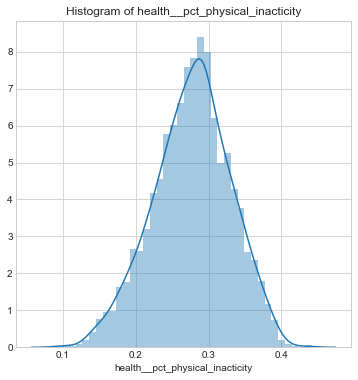

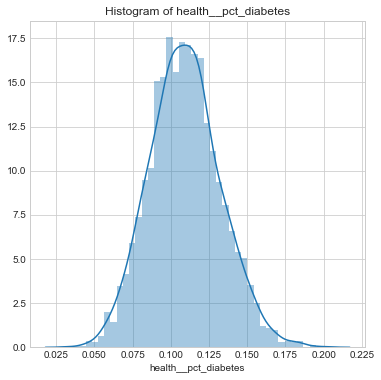

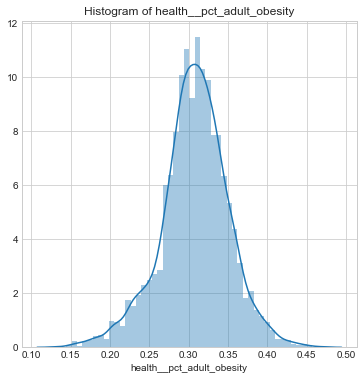

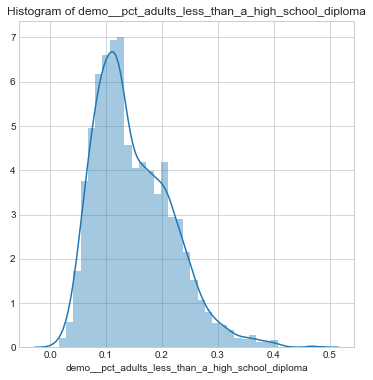

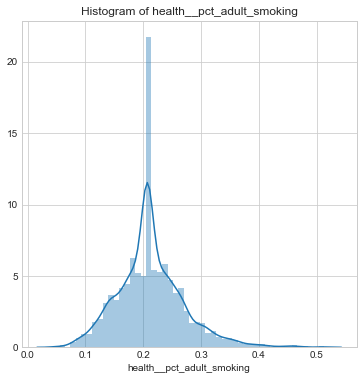

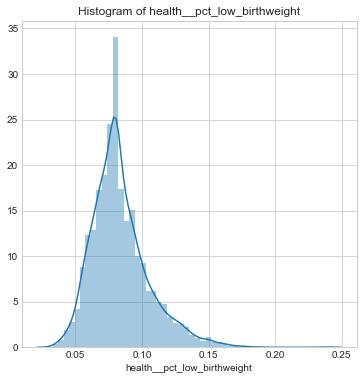

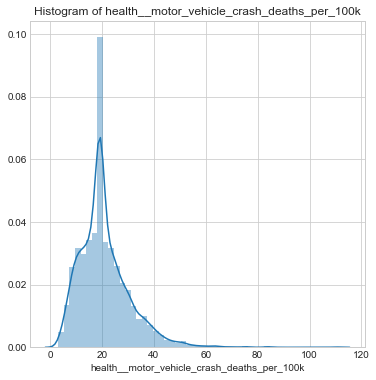

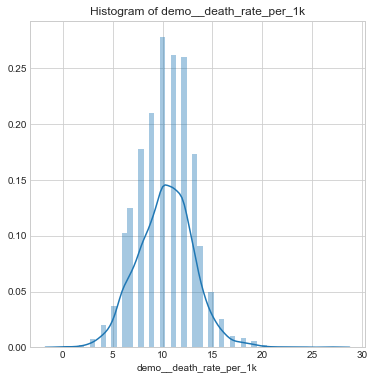

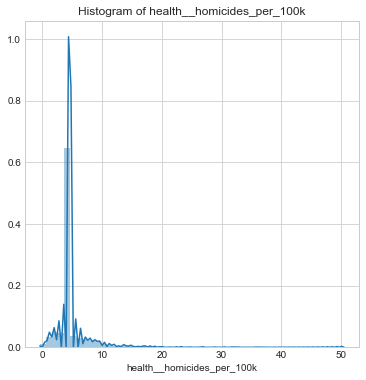

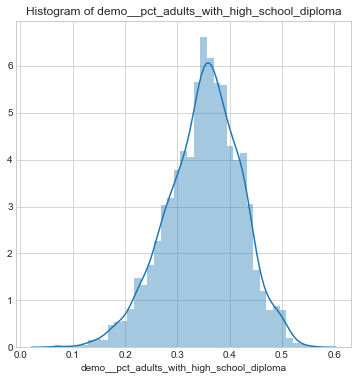

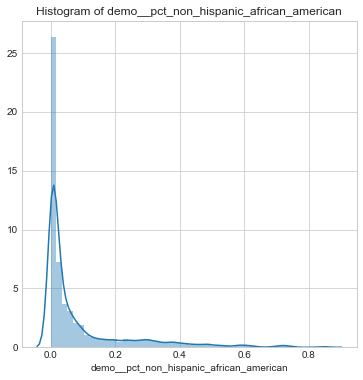

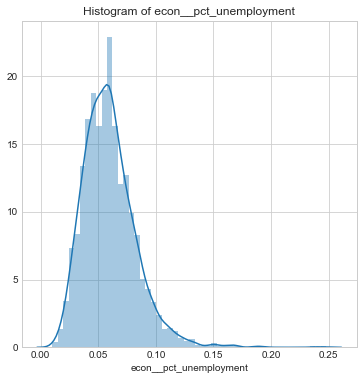

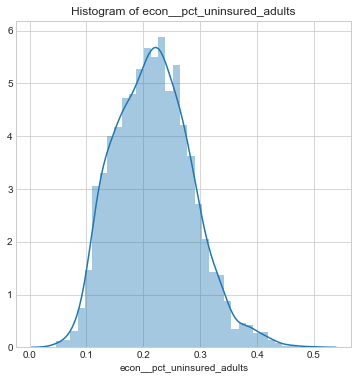

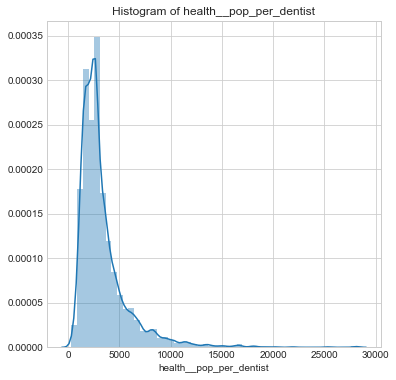

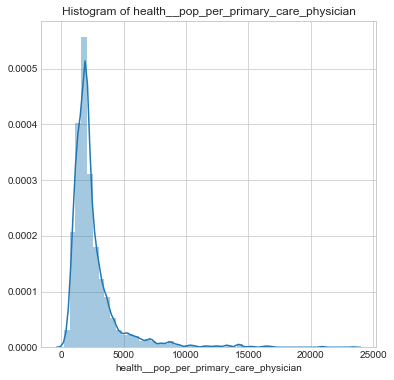

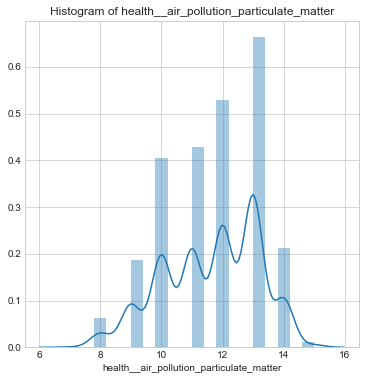

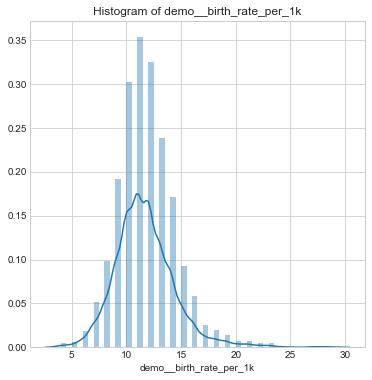

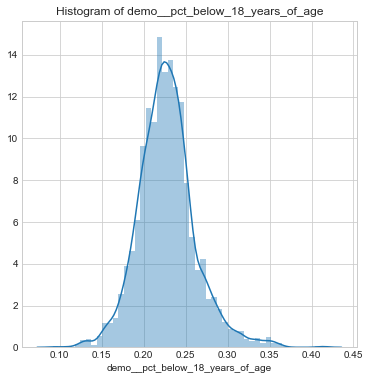

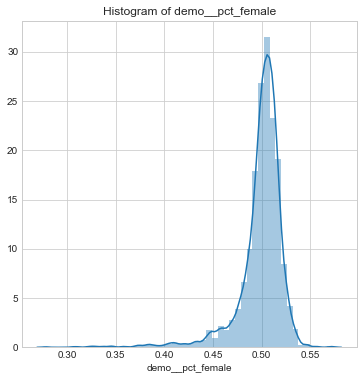

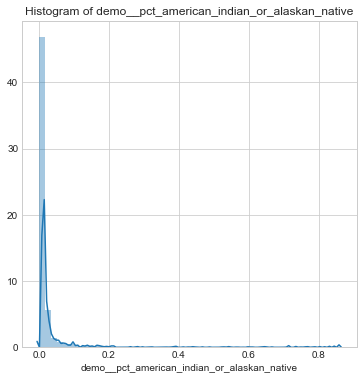

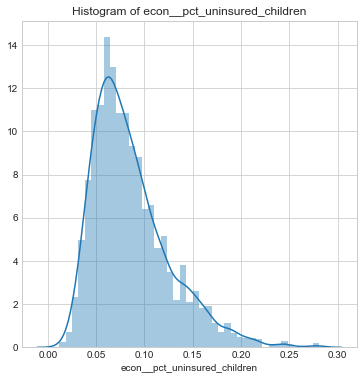

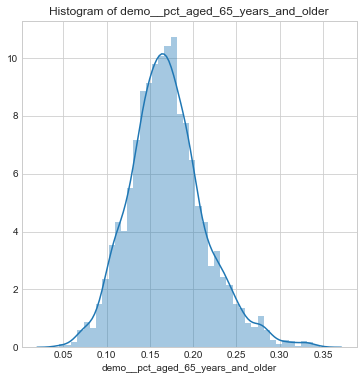

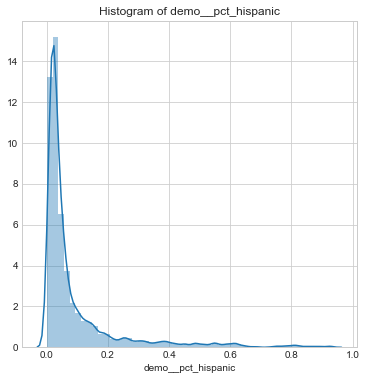

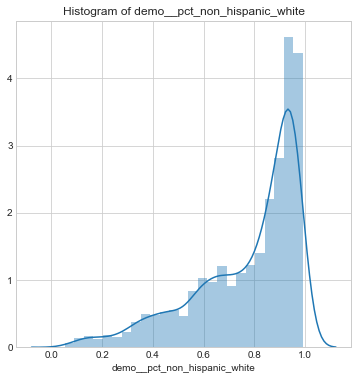

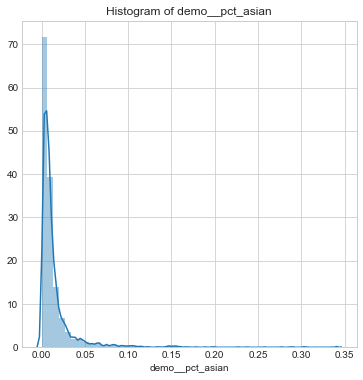

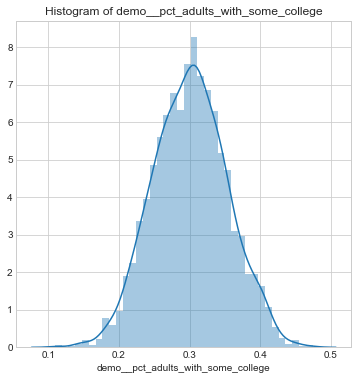

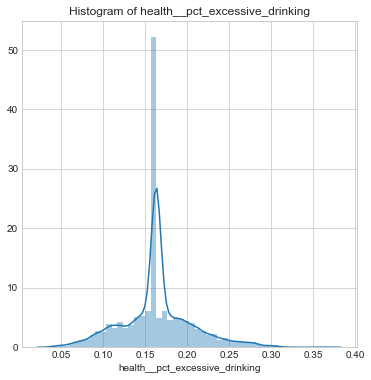

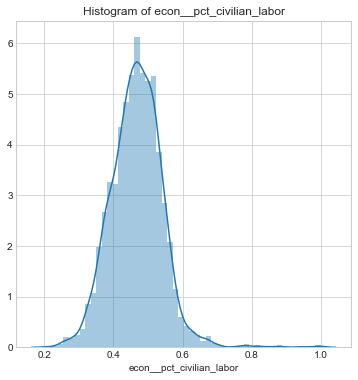

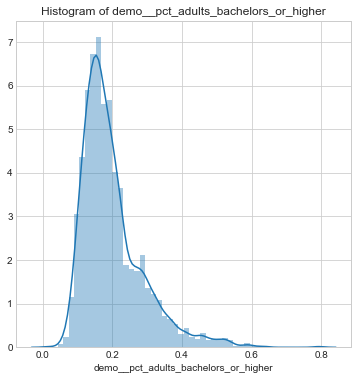

In [18]:
def plot_density_hist(train, cols, bins = 10, hist = True):
    for col in cols:
        fig = plt.figure(figsize = (6,6))
        sns.set_style("whitegrid")
        sns.distplot(train[col].dropna(), hist = hist)
        plt.title("Histogram of " + col)
        plt.xlabel(col)
        plt.ylabel("")
        plt.savefig("hist.png")
        plt.show()

num_cols = ["health__pct_physical_inacticity", "health__pct_diabetes", "health__pct_adult_obesity", "demo__pct_adults_less_than_a_high_school_diploma",
           "health__pct_adult_smoking", "health__pct_low_birthweight", "health__motor_vehicle_crash_deaths_per_100k", "demo__death_rate_per_1k",
           "health__homicides_per_100k", "demo__pct_adults_with_high_school_diploma", "demo__pct_non_hispanic_african_american",
            "econ__pct_unemployment", "econ__pct_uninsured_adults", "health__pop_per_dentist", "health__pop_per_primary_care_physician",
            "health__air_pollution_particulate_matter", "demo__birth_rate_per_1k", "demo__pct_below_18_years_of_age", "demo__pct_female",
            "demo__pct_american_indian_or_alaskan_native", "econ__pct_uninsured_children", "demo__pct_aged_65_years_and_older", "demo__pct_hispanic",
            "demo__pct_non_hispanic_white", "demo__pct_asian", "demo__pct_adults_with_some_college", "health__pct_excessive_drinking",
            "econ__pct_civilian_labor", "demo__pct_adults_bachelors_or_higher"]

plot_density_hist(train, num_cols)

In [19]:
corr = train.corr()
corr.sort_values(["heart_disease_mortality_per_100k"], ascending = False, inplace = True)
print(corr.heart_disease_mortality_per_100k)

heart_disease_mortality_per_100k                    1.000000
health__pct_physical_inacticity                     0.649813
health__pct_diabetes                                0.631337
health__pct_adult_obesity                           0.593316
demo__pct_adults_less_than_a_high_school_diploma    0.527382
health__pct_low_birthweight                         0.464391
health__pct_adult_smoking                           0.463138
demo__death_rate_per_1k                             0.444757
health__motor_vehicle_crash_deaths_per_100k         0.435633
demo__pct_adults_with_high_school_diploma           0.428137
demo__pct_non_hispanic_african_american             0.375537
econ__pct_unemployment                              0.371620
econ__pct_uninsured_adults                          0.334027
health__pop_per_dentist                             0.292447
health__homicides_per_100k                          0.292377
health__pop_per_primary_care_physician              0.217936
health__air_pollution_pa

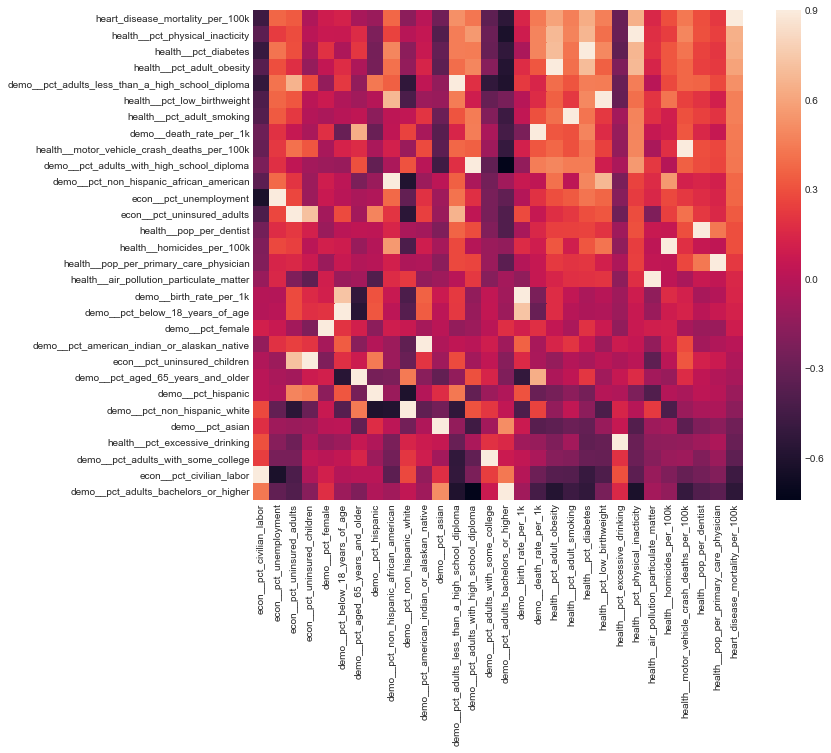

In [20]:
corrmatrix = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)
plt.show()

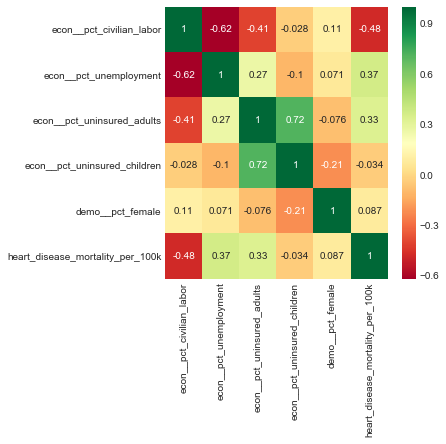

In [21]:
top_corr_features = corrmatrix.index[abs(corr["heart_disease_mortality_per_100k"]) > 0.5]
plt.figure(figsize=(5,5))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [22]:
train["area__rucc"].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         608
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    484
Metro - Counties in metro areas of 1 million population or more                                  436
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     418
Metro - Counties in metro areas of 250,000 to 1 million population                               370
Metro - Counties in metro areas of fewer than 250,000 population                                 322
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        238
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          222
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                      100
Name: area__rucc, dtype: int64

In [23]:
train["area__urban_influence"].value_counts()

Small-in a metro area with fewer than 1 million residents                                             692
Large-in a metro area with at least 1 million residents or more                                       436
Noncore adjacent to a small metro with town of at least 2,500 residents                               346
Micropolitan adjacent to a small metro area                                                           262
Micropolitan not adjacent to a metro area                                                             254
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    210
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                210
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          206
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             176
Noncore adjacent to a large metro area        

In [24]:
train["econ__economic_typology"].value_counts()

Nonspecialized                        1266
Manufacturing-dependent                494
Farm-dependent                         482
Federal/State government-dependent     390
Recreation                             312
Mining-dependent                       254
Name: econ__economic_typology, dtype: int64

In [25]:
train["yr"].value_counts()

a    1599
b    1599
Name: yr, dtype: int64

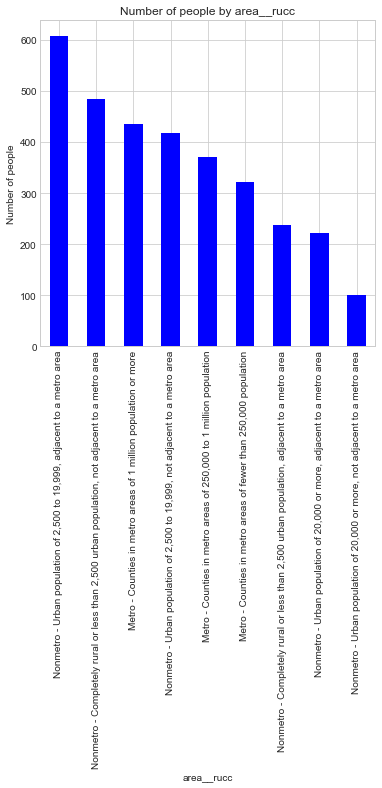

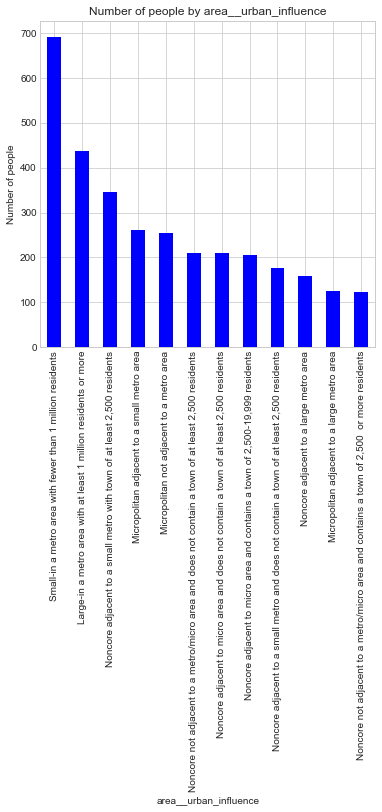

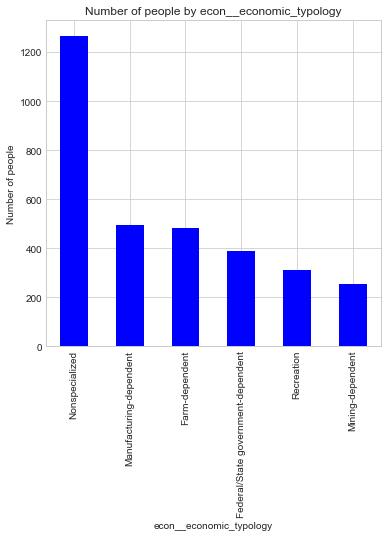

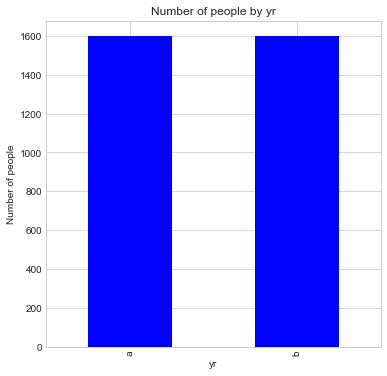

In [26]:
cat_cols = ["area__rucc", "area__urban_influence", "econ__economic_typology", 
             "yr"]

def plot_bars(train, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) 
        ax = fig.gca()     
        counts = train[col].value_counts() 
        counts.plot.bar(ax = ax, color = 'blue') 
        ax.set_title('Number of people by ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of people')
        plt.show()

plot_bars(train, cat_cols)

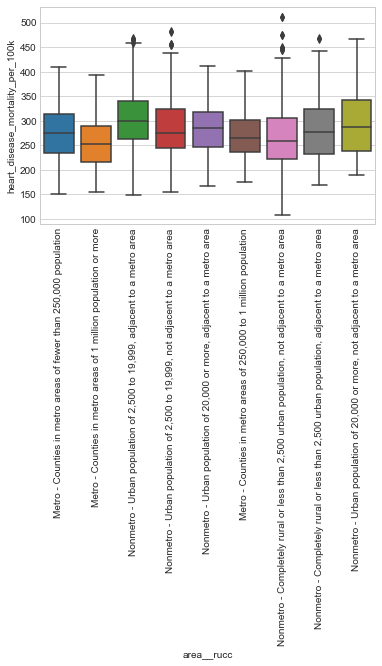

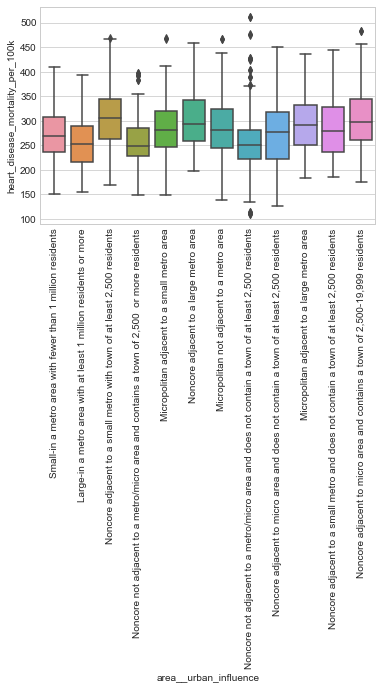

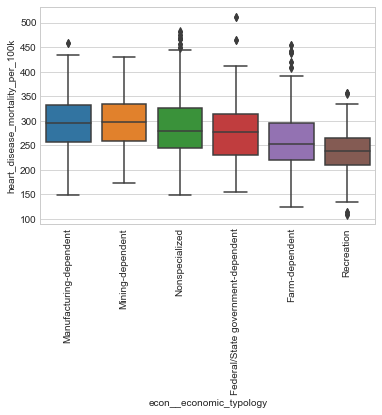

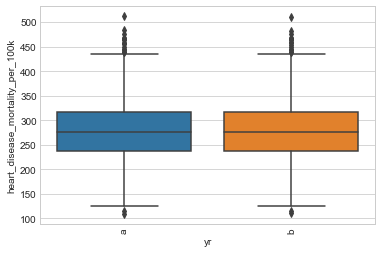

In [27]:
def plot_box(train, cols, col_y = "heart_disease_mortality_per_100k"):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data = train)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.xticks(rotation=90)
        plt.show()
        
plot_box(train, cat_cols)

In [28]:
train.drop(["heart_disease_mortality_per_100k"], axis=1, inplace=True)
    

In [29]:
train = pd.get_dummies(train)
train.shape


(3198, 58)

In [30]:
#test = pd.get_dummies(test)
train2.columns
#train.columns



Index(['row_id', 'area__rucc', 'area__urban_influence',
       'econ__economic_typology', 'econ__pct_civilian_labor',
       'econ__pct_unemployment', 'econ__pct_uninsured_adults',
       'econ__pct_uninsured_children', 'demo__pct_female',
       'demo__pct_below_18_years_of_age', 'demo__pct_aged_65_years_and_older',
       'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american',
       'demo__pct_non_hispanic_white',
       'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian',
       'demo__pct_adults_less_than_a_high_school_diploma',
       'demo__pct_adults_with_high_school_diploma',
       'demo__pct_adults_with_some_college',
       'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k',
       'demo__death_rate_per_1k', 'health__pct_adult_obesity',
       'health__pct_adult_smoking', 'health__pct_diabetes',
       'health__pct_low_birthweight', 'health__pct_excessive_drinking',
       'health__pct_physical_inacticity',
       'health__air_pollution_

In [31]:
#ML PART
train.columns

Index(['econ__pct_civilian_labor', 'econ__pct_unemployment',
       'econ__pct_uninsured_adults', 'econ__pct_uninsured_children',
       'demo__pct_female', 'demo__pct_below_18_years_of_age',
       'demo__pct_aged_65_years_and_older', 'demo__pct_hispanic',
       'demo__pct_non_hispanic_african_american',
       'demo__pct_non_hispanic_white',
       'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian',
       'demo__pct_adults_less_than_a_high_school_diploma',
       'demo__pct_adults_with_high_school_diploma',
       'demo__pct_adults_with_some_college',
       'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k',
       'demo__death_rate_per_1k', 'health__pct_adult_obesity',
       'health__pct_adult_smoking', 'health__pct_diabetes',
       'health__pct_low_birthweight', 'health__pct_excessive_drinking',
       'health__pct_physical_inacticity',
       'health__air_pollution_particulate_matter',
       'health__homicides_per_100k',
       'health__motor_veh

In [32]:
x_train, x_test, y_train, y_test = train_test_split(train, label, shuffle=True, train_size=0.7, random_state=0)

In [33]:
x_test.shape

(960, 58)

In [34]:
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

In [35]:
def print_metrics(y_true, y_predicted):
    r2 = sklm.r2_score(y_true, y_predicted)
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    
def resid_plot(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def hist_resids(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    plt.show()

In [36]:
nr.seed(11)
#GB_mod = GradientBoostingRegressor(n_estimators = 500, 
 #   max_depth= 5, 
 #   min_samples_split= 3,
 #   learning_rate= 0.05,
  #  loss= 'ls',
 #   criterion= 'mse') 

GB_mod = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GB_mod.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

Mean Square Error      = 760.059787525
Root Mean Square Error = 27.569181843597576
Mean Absolute Error    = 20.5801765101
Median Absolute Error  = 16.1189491488
R^2                    = 0.774893728293


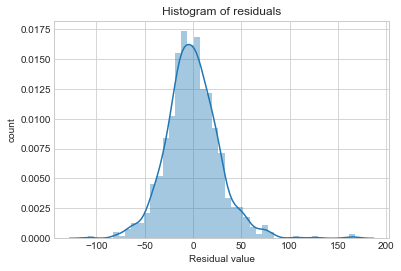

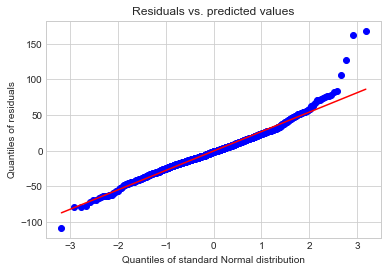

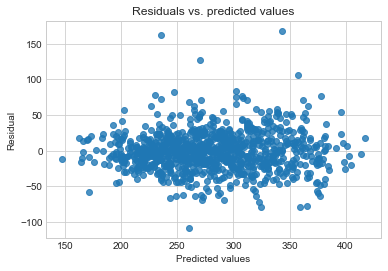

In [37]:
GB_preds = GB_mod.predict(x_test)
print_metrics(y_test, GB_preds) 
hist_resids(y_test, GB_preds)  
resid_qq(y_test, GB_preds) 
resid_plot(y_test, GB_preds)

In [38]:
GB_preds1 = np.round(GB_preds)

In [39]:
GB_preds1 = np.array(GB_preds1,dtype=int)

In [40]:
nr.seed(11)
LGBM_mod = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720) 
LGBM_mod.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=720,
       n_jobs=-1, num_leaves=5, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

Mean Square Error      = 943.992085972
Root Mean Square Error = 30.724454201370765
Mean Absolute Error    = 23.5966442295
Median Absolute Error  = 19.1042924477
R^2                    = 0.720418653266


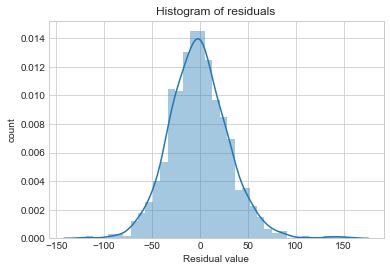

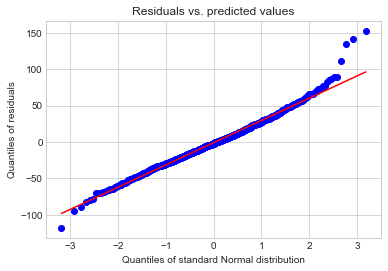

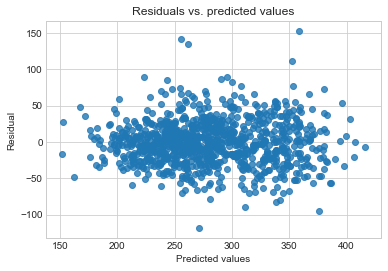

In [41]:
LGBM_preds = LGBM_mod.predict(x_test)
print_metrics(y_test, LGBM_preds) 
hist_resids(y_test, LGBM_preds)  
resid_qq(y_test, LGBM_preds) 
resid_plot(y_test, LGBM_preds)

In [42]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

Mean Square Error      = 764.893742978
Root Mean Square Error = 27.656712439795168
Mean Absolute Error    = 21.328682677
Median Absolute Error  = 16.7709960938
R^2                    = 0.773462059748


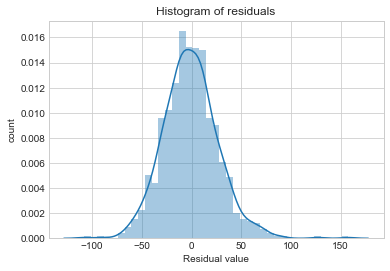

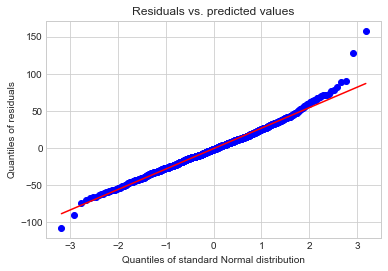

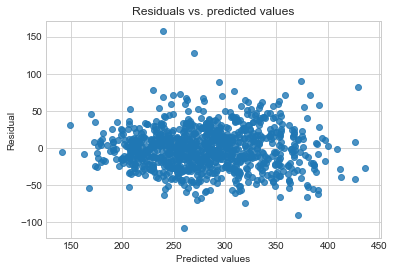

In [43]:

xgb_train_pred = model_xgb.predict(x_test)
print_metrics(y_test, xgb_train_pred) 
hist_resids(y_test, xgb_train_pred)  
resid_qq(y_test, xgb_train_pred) 
resid_plot(y_test, xgb_train_pred)


In [44]:
test = pd.get_dummies(test)
test.columns

Index(['econ__pct_civilian_labor', 'econ__pct_unemployment',
       'econ__pct_uninsured_adults', 'econ__pct_uninsured_children',
       'demo__pct_female', 'demo__pct_below_18_years_of_age',
       'demo__pct_aged_65_years_and_older', 'demo__pct_hispanic',
       'demo__pct_non_hispanic_african_american',
       'demo__pct_non_hispanic_white',
       'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian',
       'demo__pct_adults_less_than_a_high_school_diploma',
       'demo__pct_adults_with_high_school_diploma',
       'demo__pct_adults_with_some_college',
       'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k',
       'demo__death_rate_per_1k', 'health__pct_adult_obesity',
       'health__pct_adult_smoking', 'health__pct_diabetes',
       'health__pct_low_birthweight', 'health__pct_excessive_drinking',
       'health__pct_physical_inacticity',
       'health__air_pollution_particulate_matter',
       'health__homicides_per_100k',
       'health__motor_veh

In [45]:
submission_test = scale.transform(test)

In [46]:
GB_preds_submission = GB_mod.predict(submission_test)
LGBM_preds = LGBM_mod.predict(submission_test)
xgb_pred = model_xgb.predict(submission_test)

In [47]:

ensemble = LGBM_preds*0.3 + GB_preds_submission*0.7 
ensemble

array([ 182.47061844,  278.16679006,  288.28819363, ...,  220.72605137,
        275.3918119 ,  313.89608192])

In [48]:
ensemble = np.round(ensemble)
ensemble = np.array(ensemble,dtype=int)
ensemble

array([182, 278, 288, ..., 221, 275, 314])

In [49]:
prediction_df = pd.DataFrame({'row_id': test_Id, 'heart_disease_mortality_per_100k': ensemble})
prediction_df[["row_id","heart_disease_mortality_per_100k"]].to_csv("submission_format.csv", index = False)